# Resource link:
https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?resource=download

# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #2D2926; text-align: center; line-height: 0.75;background-color: #FF781F"><b>Unsupervised Learning : Fund Allocation For Countries in Need</b><br></h1>



### Problem Statement :

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. HELP International have been able to raise around $ 10 million. This money now needs to be allocated strategically and effectively. Hence, inorder to decide the selection of the countries that are in the direst need of aid, data driven decisions are to be made. Thus, it becomes necessary to categorise the countries using socio-economic and health factors that determine the overall development of the country. Thus, based on these clusters of the countries depending on their conditions, funds will be allocated for assistance during the time of disasters and natural calamities. It is a clear cut case of unsupervised learning where we have to create clusters of the countries based on the different feature present.

### Aim :
- To cluster countries based on numerical features.
- It is an **Unsupervised Learning** problem statement.

### <center>Dataset Attributes</center>
    
- **country** : Name of the country
- **child_mort** : Death of children under 5 years of age per 1000 live births
- **exports** : Exports of goods and services per capita. Given as %age of the GDP per capita
- **health** : Total health spending per capita. Given as %age of GDP per capita
- **imports** : Imports of goods and services per capita. Given as %age of the GDP per capita
- **Income** : Net income per person
- **Inflation** : The measurement of the annual growth rate of the Total GDP
- **life_expec** : The average number of years a new born child would live if the current mortality patterns are to rem...
- **total_fer** : The number of children that would be born to each woman if the current age-fertility rates remain th...
- **gdpp** : The GDP per capita. Calculated as the Total GDP divided by the total population.

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering
- Modeling
- Conclusion

### What you will learn :
- Data Visualization techniques. 
- Feature Engineering & PCA.
- K-Means Clustering vs DBSCAN Clustering vs Hierarchical Clustering model performance.

### Related Work :

- [Binary Classification](https://www.kaggle.com/competitions/titanic/discussion/352223) **: It is a discussion post that describes the approach required to deal with Binary Classification problems explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Time Series Analysis](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/discussion/352205) **: It is a discussion post that describes the basics of Time Series Analysis explained through notebooks that contain work done on datasets with easy and understandable code explanation!**
- [Unsupervised Learning](https://www.kaggle.com/code/tanmay111999/mall-customer-segmentation-k-means-eda) **: It is a notebook that describes the work on Unsupervised Learning problem using K-Means clustering algorithm!**

### Lets get started!

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
!pip install -U kaleido
import kaleido

In [4]:
#read dataset from ../data/country-data.csv
data = pd.read_csv("./data/Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


### Data Info :

In [5]:
# lets see the dimensions of the data -> data shape
data.shape

(167, 10)

In [6]:
# data columns
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
#display all the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<Axes: >

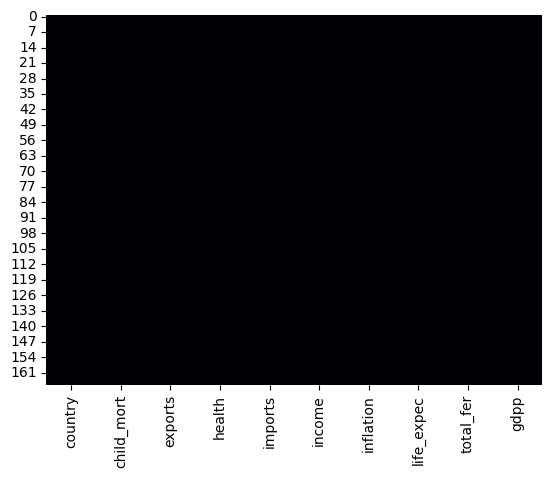

In [12]:
#display the heat map of the null data
sns.heatmap(data.isnull(),cmap='magma',cbar=False)

- **No null values** present in the data!

In [14]:
#we want to see the mean, count, avg, max, min , and standard deviation of the dataset.
#what command should we use?
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


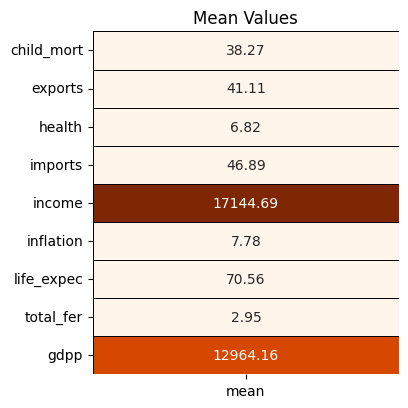

In [10]:
#create a subplot with 1 row, 1 col and figure size (5,5)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
colors = ['#FF781F','#2D2926']
plt.subplot(1,1,1)
sns.heatmap(data.describe().T[['mean']],cmap = 'Oranges',annot = True,fmt = '.2f',linecolor = 'black',linewidths = 0.4,cbar = False);
plt.title('Mean Values');

fig.tight_layout(pad = 4)

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

In [7]:
col = list(data.columns)
col.remove('country') #remove the country value
categorical_features = ['country']
numerical_features = [*col] # This uses the unpacking operator * to create a new list numerical_features 
        #containing all the elements in col. At this point, col should contain all the columns except for 'country', 
        # implying these are considered numerical features.
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


- For this dataset, as the number of features are less, we manually check the dataset.
- Clearly, except **country**, all the features are numerical features with their element datatype being either float or integer.
- We use the typical approach for division of features i.e based on the datatypes of the elements of the respective feature.

**Eg :** datatype = integer, feature = numerical feature ; datatype = string, feature = categorical feature

### Distribution of Features :

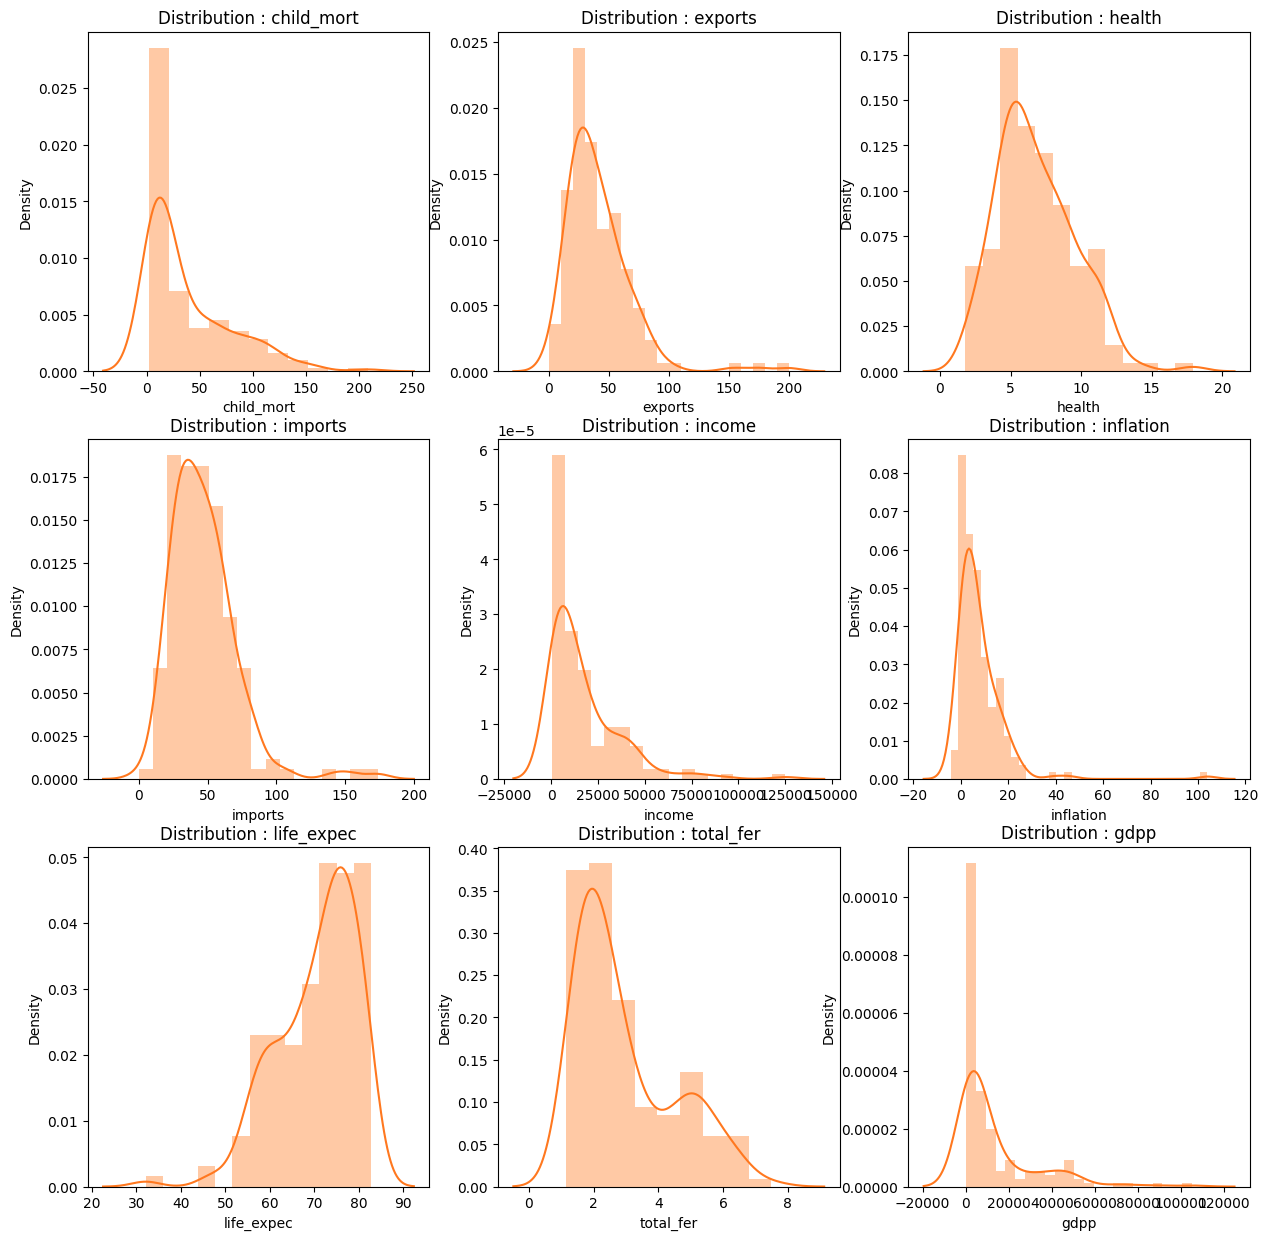

In [11]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **life_expec** displays a **left or negatively skewed data distribution**.
- **health** displays a **normally distrubuted data**.
- All the remaining features show a **right or positively skewed data distribution**.
- Data distribution of **country** is not put out as it has text data and it has the same number of unique values as the length of the dataframe.

### Features of Economically Backward Countries :

- The country's **per capita income is very low**.
- **High Population** that leads to non - availability of resources.
- **Unemployment** due to less resources.
- **Low country wealth** that leads to **low capital**.
- **Inequitable** distribution of **wealth** and **income**.  
- **Lack of proper educational amenities** and thus **illiteracy prevails**.
- **Low level of living**.
- **No technical advancement**.
- **Poor health services** coupled with **high birth & death rates**.

**HELP Foundation needs to target the countries that display the above characteristics. We will now visualize the data and find the countries that lie at the extremes and the center of the each feature to point out the countries that require assistance!**

### country vs Numerical Features : 

- **child_mort : Economically backward nations have a high infant mortality rate!**

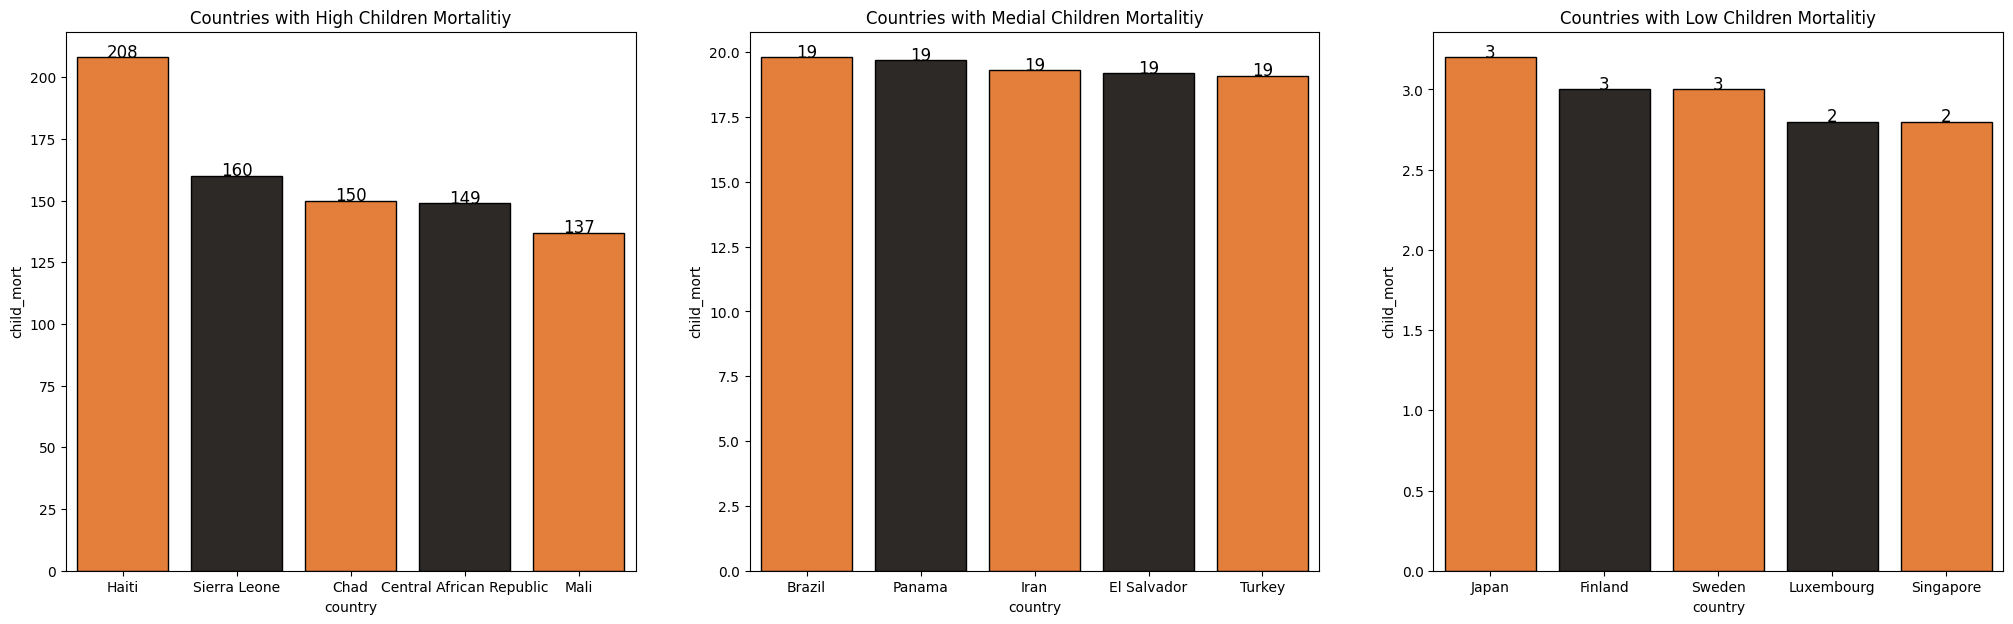

In [12]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = data.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **Haiti** has the highest children's deaths. **African countries** have significant positions in this statistic.
- At the other extreme of **child_mort**, countries from **Asia and Europe** has some solid presence. 

- **exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!**

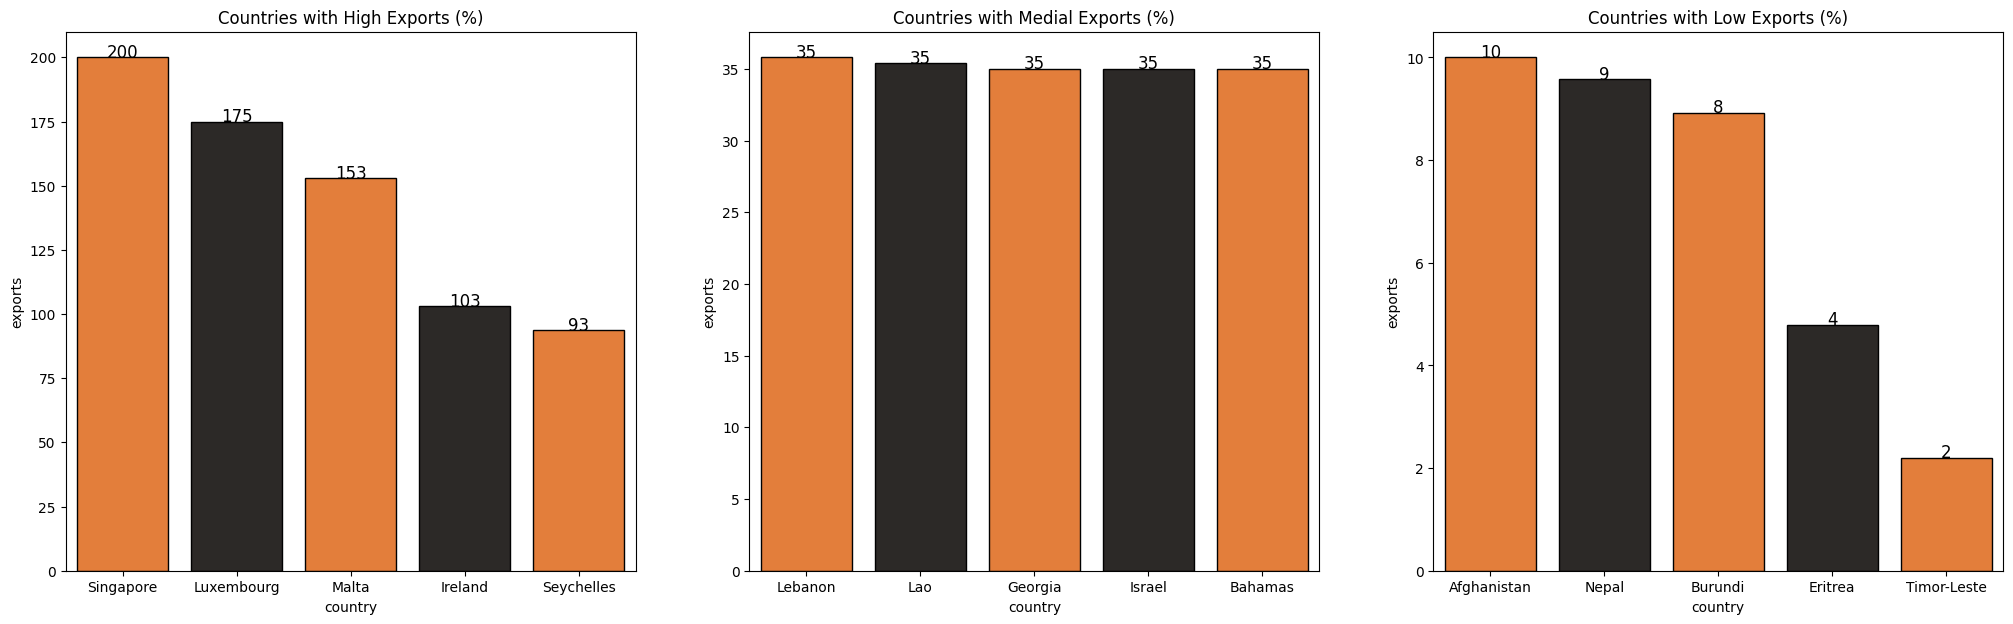

In [13]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = data.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **exports** of a nation are usually goods and services created domestically but sold to other nations. Goods and services exported depends on factors like the geographical location, natural resources, population size & their preference towards specific skills, etc.
- Despite **Singapore's** population size not being in the top 100, they have the highest number of **exports**. **Luxembourg** & **Malta** have probably followed the same route.
- **Afghanistan** & **Nepal** are present in the lower end of **exports**. Geographical locations of these nations have a heavy influence. Countries with lower exports also have small geographical area.

- **health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!**

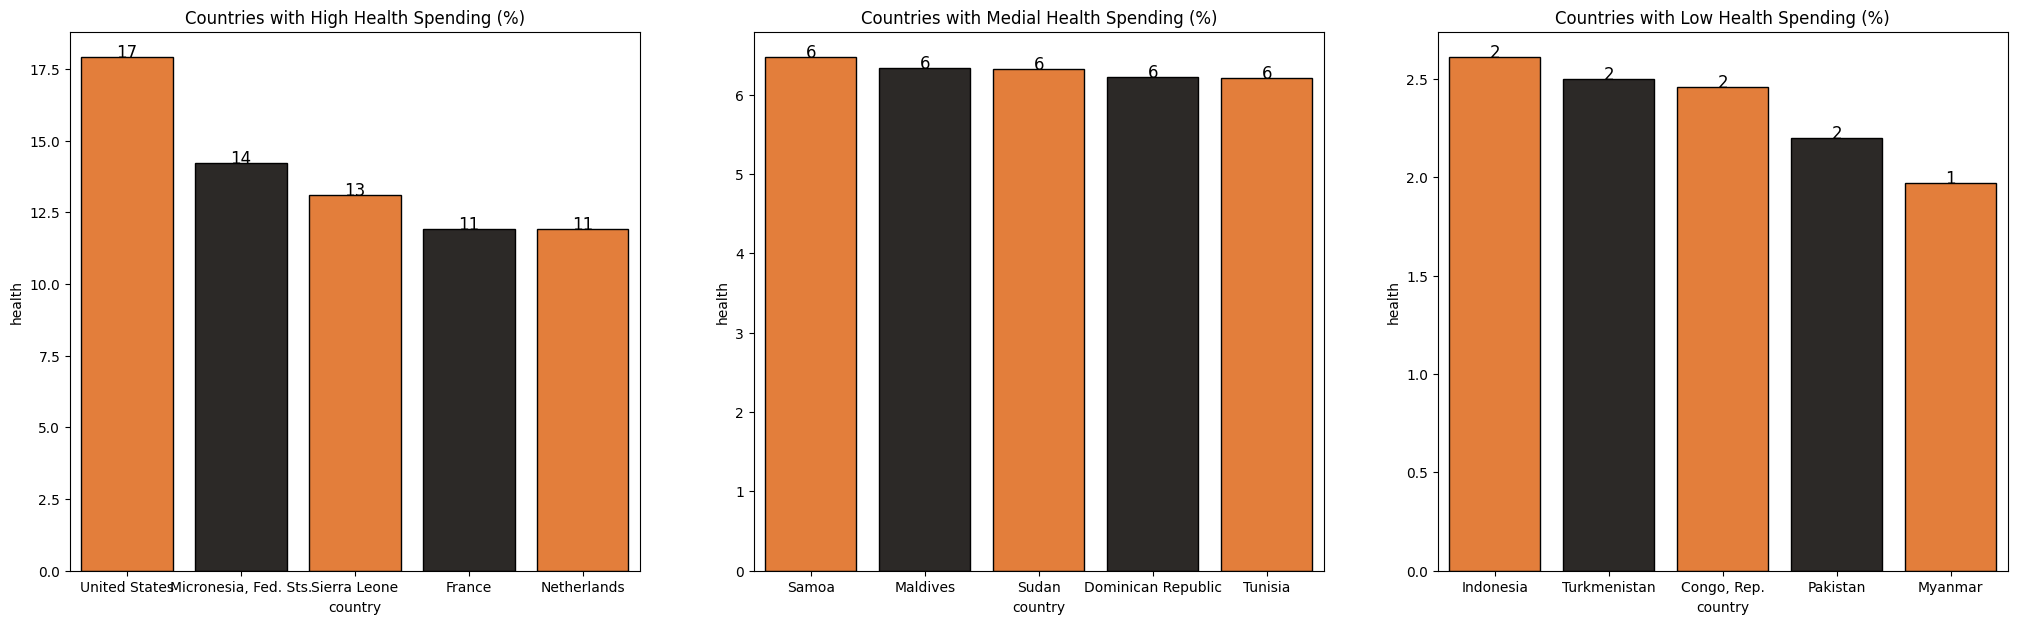

In [14]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = data.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **US** stands at the top when it comes to spending on health with **17%** of the individual GDP contribution.
- **6%** seems to be the mean values of the citizens spending on their **health**.
- **Asian** countries dominate the lower end of **health** with less than **3%**. They are the most ignorant citizens when it comes to health.

- **imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!**

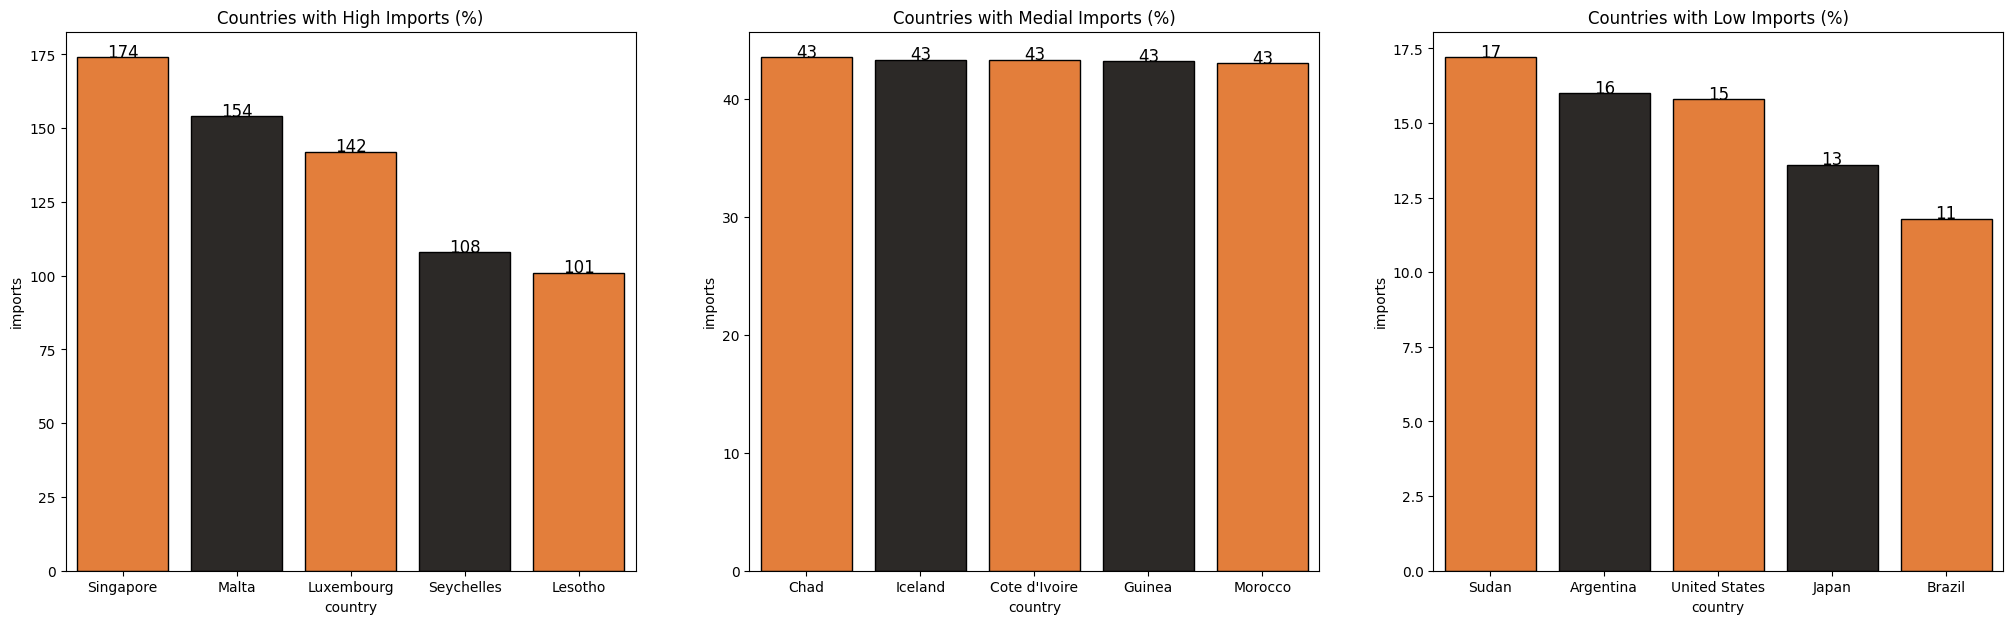

In [15]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = data.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **imports** stats of a nation describe the self reliance of a nation to solve their problems irrespective of being handicapped on one of the essential resources.
- **Singapore**, **Malta**, **Luxembourg** & **Seychelles** are present in the top 5 of **exports** as well as **imports**. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid **exports** that gets countered by the heavy **imports** on something else. This just balances the books!
- **Brazil** has the lowest **imports** out of all the nations with **11%**. **Sudan** is the only African country present in this lower end list with **17%**.

- **income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!**

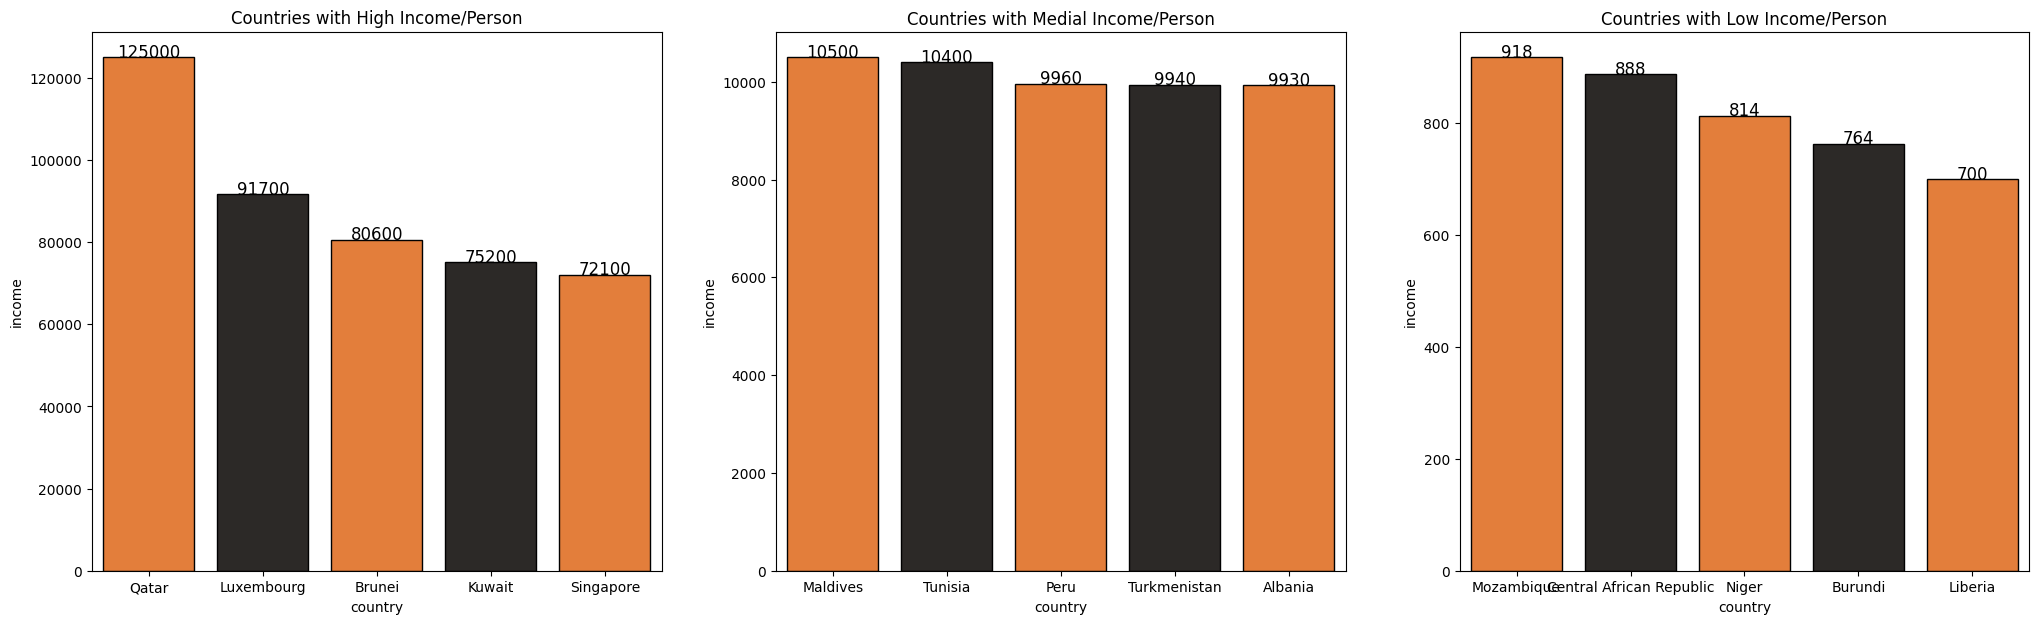

In [16]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = data.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Citizens of the **Qatar** have the highest **income** out of all the countries with a difference of **30k** more than the 2nd placed countries. **Singapore** & **Luxembourg** are again present in the top 5 of another feature.
- Lower end of the **income** is dominated by the **African** nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered. 
- The difference in the **income** of the nations in the top, middle and lower end is quite significant that will have an effect on every other features.

- **inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!**

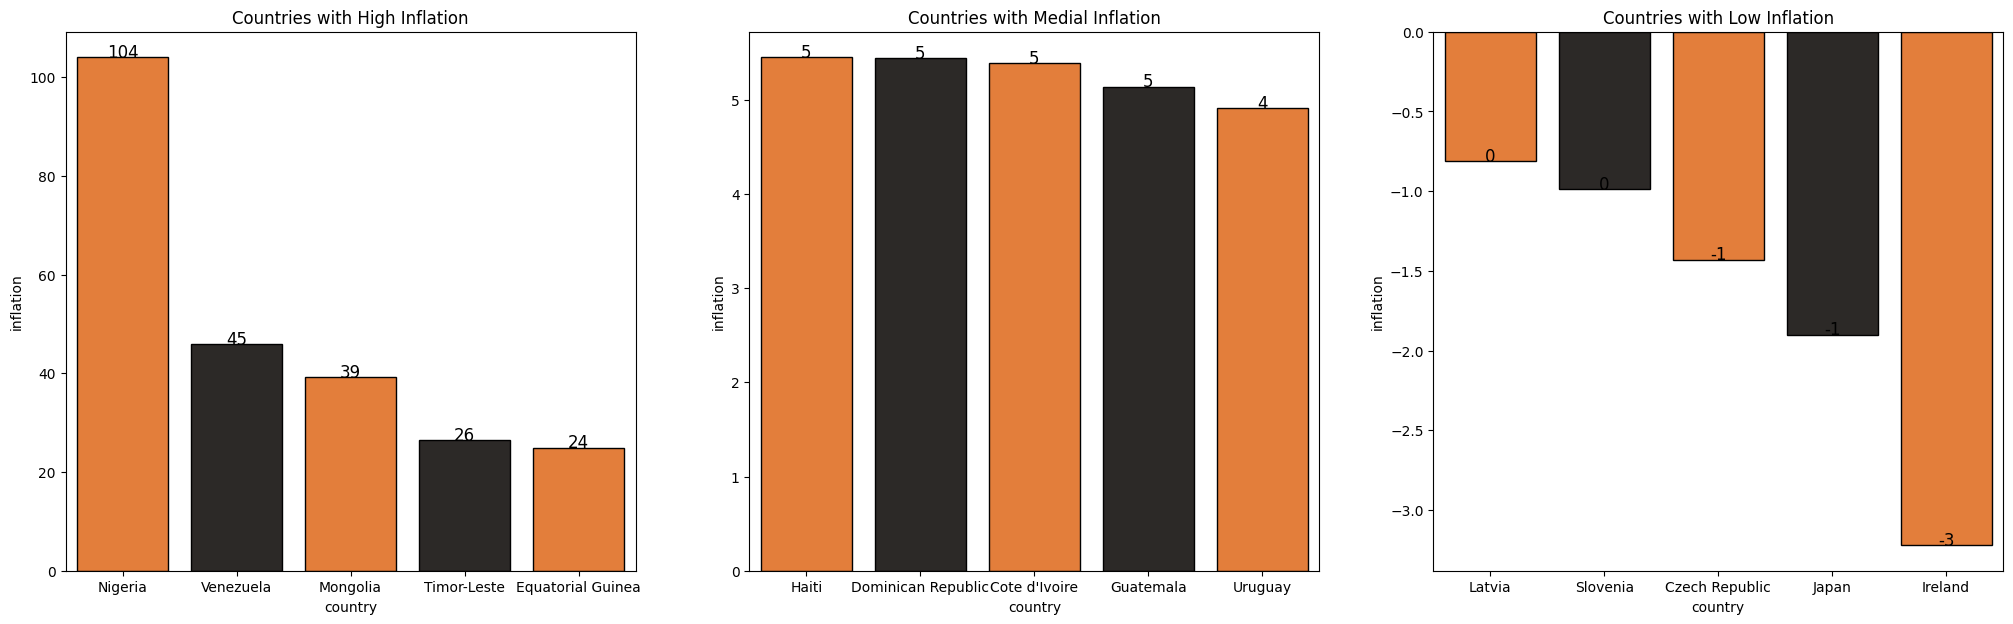

In [17]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- Higher **inflation** reduces the purchasing power of the citizens. Countries present at the top end of **inflation** have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.
- Similarly, the lower end of **inflation** has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

- **life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!**

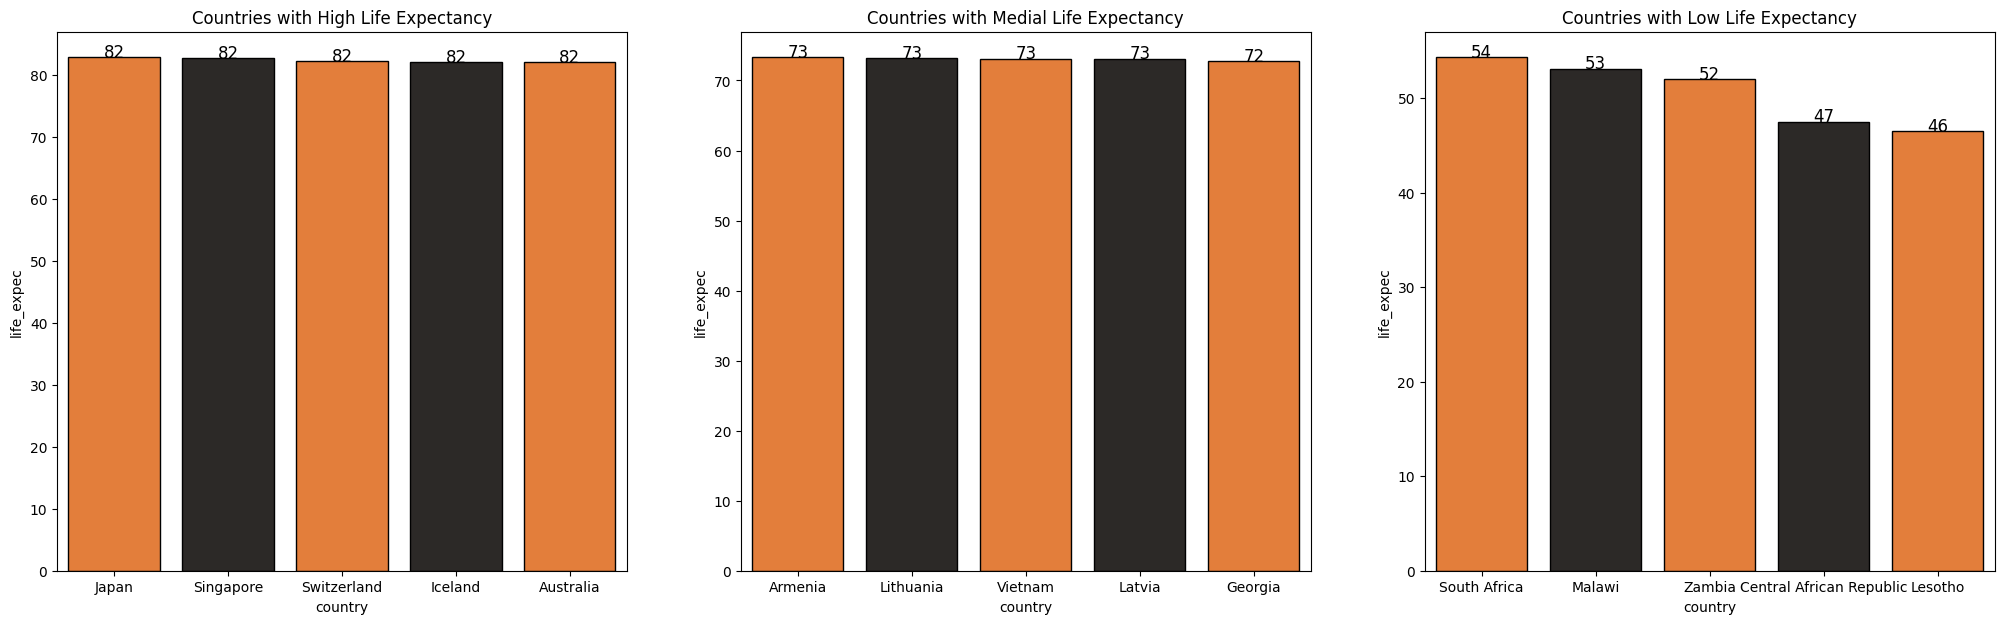

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = data.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **life_expec** depends alot on mental state as well as the lifestyle adopted by the citizens. **Singapore** is again present in the top of 5 of a feature.
- None of the countries with a high **life_expec** are present in the top 5 of **health** that is related to the spending done by the citizen on health.
- **African** countries are again present in the lower end for another feature.

- **total_fer : Economically backward countries have a high fertility rate!**

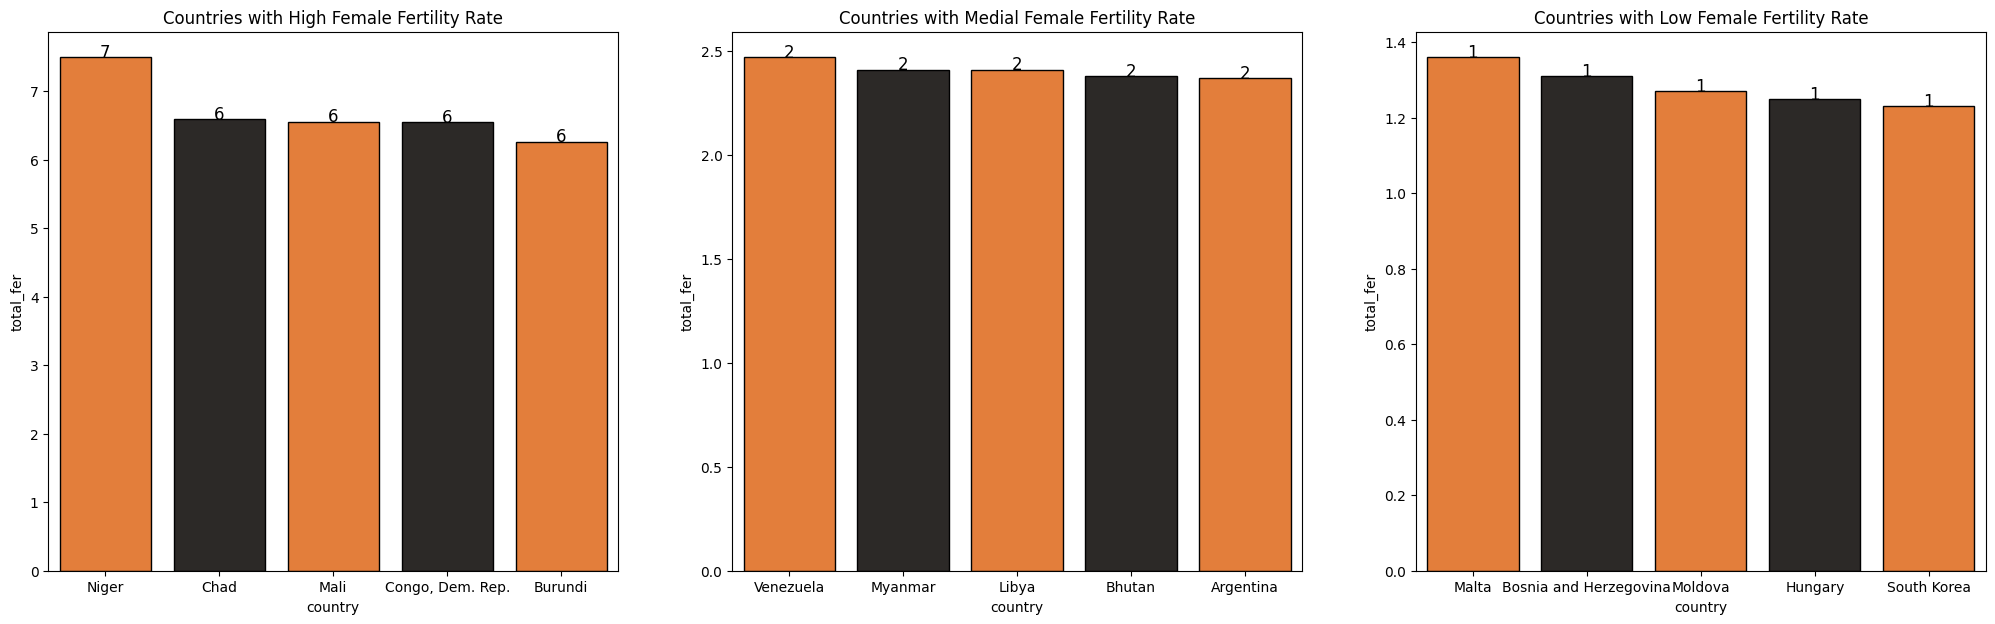

In [19]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = data.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **African** countries dominate the **total_fer** with values **6+**.
- Mean **total_fer** value is **2** whereas lower end values of **1** concern abit as well.

- **gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!**

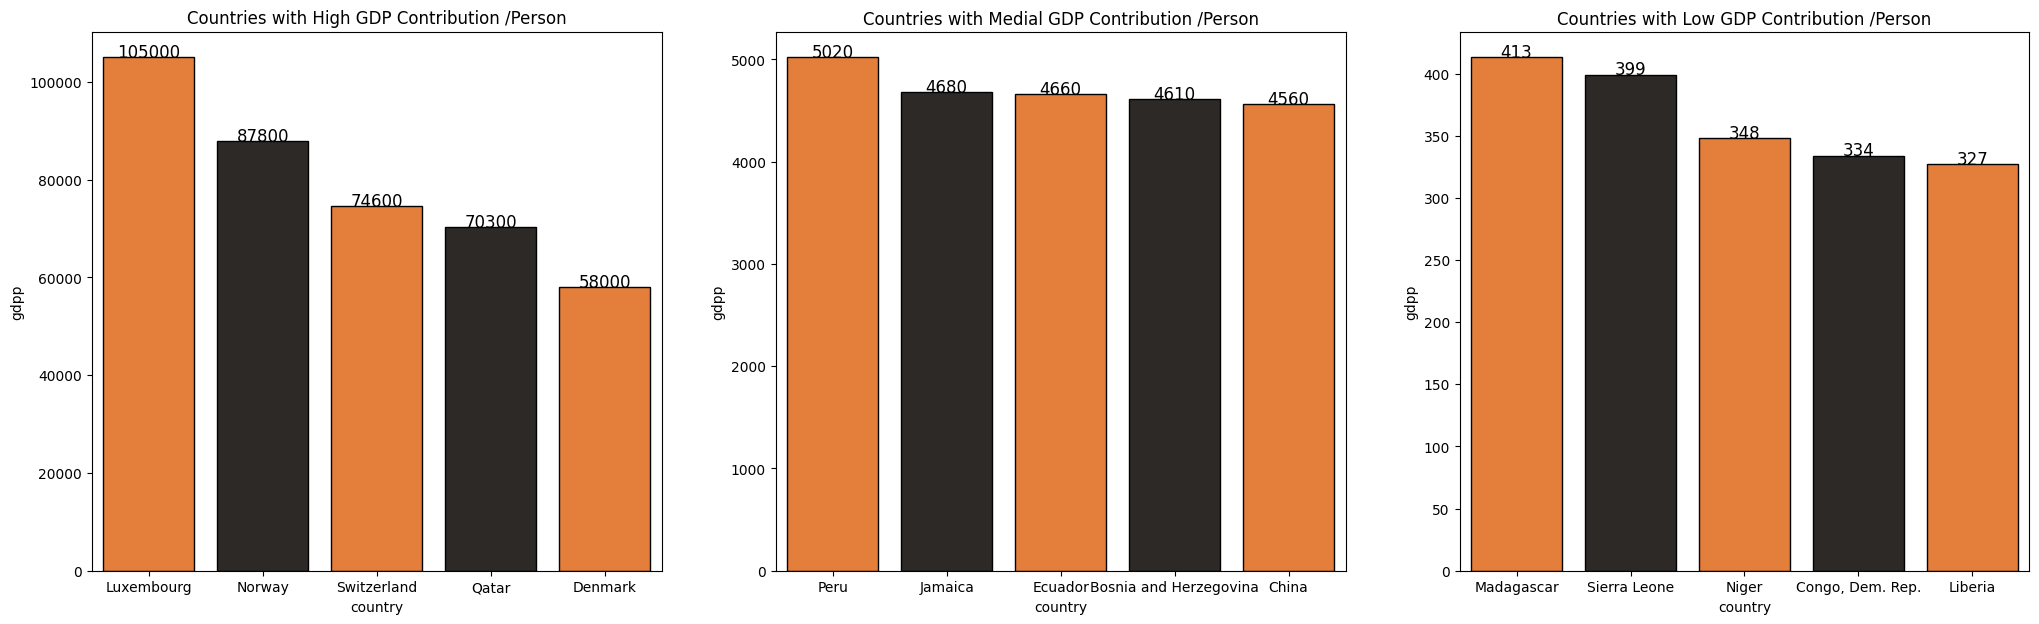

In [20]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = data.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- It is a tricky feature as the population of the nation is a significant factor. One clear cut example of this is **China**. It has a huge population alongwith huge GDP.
- **Luxembourg** is again present in the top ranks. **Switzerland** & **Qatar** are present in the top 5 similar to **income**.
- Lower end is again dominated by **African** nations that labels them as the economically backward.

###  Numerical Features :

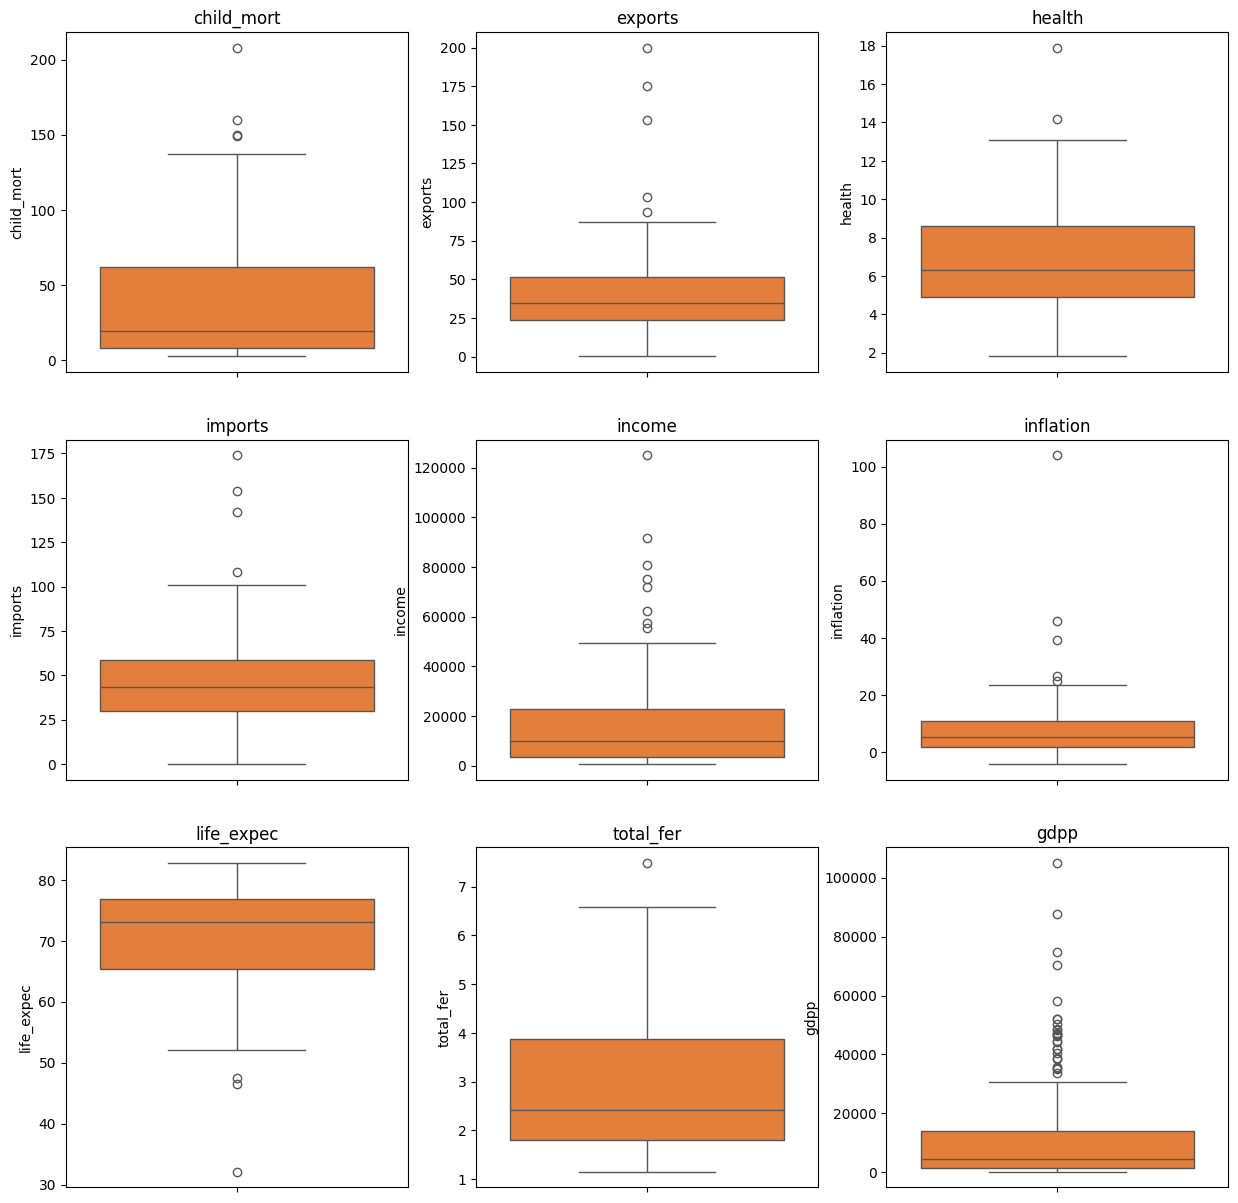

In [ ]:
#let's use boxplots to check the outliers in the numerical features
#create a subplot with 3 rows 3 columns and figsize 15,15
fig  = .....
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(.....)
    plt.title(numerical_features[i])
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Summary EDA</div></center>

- From the visualizations and the list of features of an economically backward nations, a host of insights can be gained!
- When it comes to health conditions, **African countries** hold higher ranks in all the wrong situations. They hold a significant presence in high **child_mort**, low **life_expec** and high **total_fer**. 
- All these problems are already pretty serious and hence it is very important to assist them during the periods of unforseen turmoils. Despite such numbers, **Haiti** grabs the top spot with high values of  **child_mort**. **Asian & European countries** are present at the other end of it. 
- **US** citizens are the highest spenders on their **health** however they are not present in the top 5 ranks of **life_expec** & **total_fer**. None of the countries with a high **life_expec** are present in the top 5 of **health**. **Asian countries** crowd lower end of **health**. 
- **Singapore**, **Malta**, **Luxembourg** & **Seychelles** are present in the top 5 of **exports** as well as **imports**. Population size and geographical locations play a pivotal role when it comes to **imports** and **exports**. 
- **Sudan** is the only **African** nation with low **imports** and **Brazil** has the lowest imports out of all.
- **African countries** display very high values of **inflation** whereas countries from all the continents can be found with low **inflation** values.
- Citizens of the **Qatar** are the highest paid with **Singapore** & **Luxembourg** again grabbing spots in top 5 of **income**.
- For **gdpp**, **Luxembourg** is in the top ranks. **Switzerland** & **Qatar** are present in the top 5 similar to **income**.
- **African nations** are present in the lower end of **income** as well as **gdpp**. Colonization has had a huge toll on the **African nations**.

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Correlation Matrix :

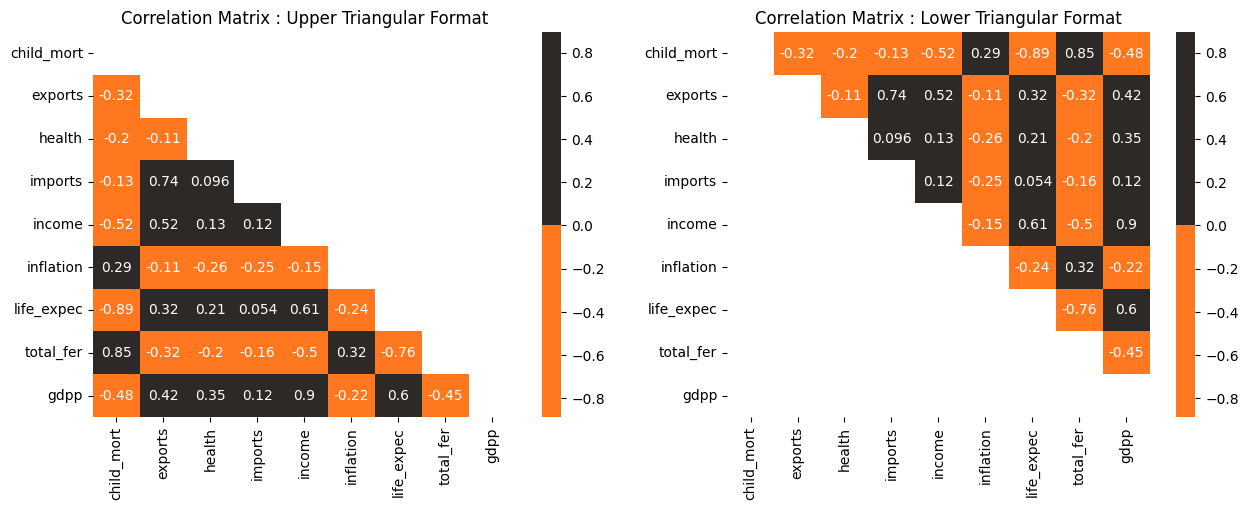

In [ ]:
data_without_country = ... #copy the data array
data_without_country = ... #drop the country field because in correlation matrix we cannot have categorical features
#create the triangular upper matrix and lower matrix for the correlation matrices
ut = np....(data_without_country.corr())  
lt = np....(data_without_country.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
#cerate the sns heatmapp for both, and use the mask one as ut and one as lt
sns.heatmap( ... ),cmap = colors,annot = True,cbar = 'True',mask = ...);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap( ... ),cmap = colors,annot = True,cbar = 'True',mask = ...);
plt.title('Correlation Matrix : Lower Triangular Format');
#why do we do it with masking not just put them both directly ?

- Many features have relationships with each other.
- **child_mort** clearly increases when **income**, **gdpp** & **exports** decreases. Rise in **inflation** also leads to high **child_mort** cases. Economic conditions unfortunately act as an important factor!
- Rise in **exports** clearly increases **gdpp**, **income** & **imports**.
- Spending on **health** has a small rise in **life_expec** and also decreases the **child_mort**.
- **income** & **gdpp** display a very high 0.9 correlation value. From the health perspective, high **income** has lead to higher **life_expec** but decreases the **total_fer** by some significant margin.
- As expected high **inflation** has a negative effect on the financial features. High **inflation** displays a high **total_fer** and **child_mort**. This describes the typical features of a backward nation.
- According to the data, higher **life_expec** displays a low **total_fer**. Higher **gdpp** has lead more spending on **health**. 

**We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.**
- The 3 categories of the features are :
    - **health** : **child_mort**, **health**, **life_expec**, **total_fer**
    - **trade** : **imports**, **exports**
    - **finance** : **income**, **inflation**, **gdpp**
- Hence, we will dissolve these features into these categories and normalize them!

steps you need to do here:
1. Normalize the data per feature by dividing by the mean value
2. aggregate the normalized data per feature to get a clean result for the new categories

In [ ]:
df1 = pd.DataFrame()
df1['Health'] = (data['....'] / mean) + (data['...'] / mean) + (data['...'] / mean()) + (data['...'] / mean())
df1['Trade'] = (data['...'] / mean()) + (data['...'] /mean())
df1['Finance'] = (data['...'] /.mean()) + (data['....'] / .mean()) + (data['...'] / .mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


### Data Scaling :

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization: it is needed because the data categories have different units and scales, so we need to normalize them
ss = StandardScaler() # Standardization: After normalization, we need to make these data points at the same scale.
#Without standardization, features with larger ranges could dominate the learning process, leading to biased results.

df1['Health'] = mms.fit_transform(....)
df1['Trade'] = mms.fit_transform(....)
df1['Finance'] = mms.fit_transform(....) 
df1...... ### Now add the country column
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl; Charges = Currency 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Health**, **Trade** and **Finance** features are normalized!


- **Standardization** : None of the features are standardized for the above data.

### Principal Component Analysis (PCA) :

- It is a dimension reduction method that is preferrably used for an Unsupervised Learning Problem.

In [ ]:
df2 = data.... #copy the data df 

col = list(data.columns)
col.remove('....') #remove health column
col.remove('....') #remove the country column

df2['health'] = ss.fit_transform(df2[['...']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


- Before passing the data for PCA transformation, **normalization** & **standardization** are very important.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

- These are the variance values of the each feature present in the dataset.

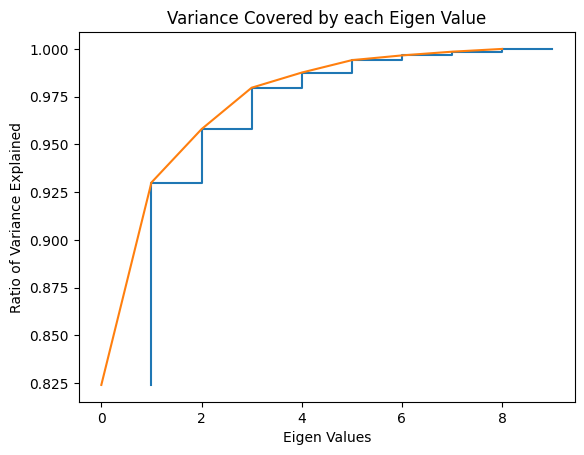

In [ ]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

- This is a very effective method where we add up the variances of all the features in cummulative format.
- Typically **eigen values with more than 95% of ratio of variance** are selected.
- They correspond to the columns of the PCA generated dataframe.
- In this case, we select the **Eigen Value : 2** as the steps generated have significant variances and thus the other features get dominated by their variances. 

In [ ]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13
3,-1.51,0.47,0.28
4,-0.26,-0.24,-0.06


- **In this way, we reduce the dimensions! We will now move on to the modeling section and compare the performances of the 2 datasets :**
    - **Feature Combination : Health - Trade - Finance**
    - **PCA Data**

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Modeling</div></center>

- **Unsupervised Learning** : It is a problem where the target variable / feature is unknown. **Unsupervised Learning** problems widely occur in medical domain where mutliple readings are taken and the underlying diseases are unknown. 
- Thus, searching for patterns by using visualization techniques provides us with some underlying insight that cannot be understood by staring into the tabular data.
- However, when the size of the datasets becomes huge with too many features, data visualization can be a tedious task to execute. Hence, we move towards the algorithmic approach.

In [ ]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

## <center>K-Means Clustering</center>

**K-Means Clustering** is a distance based algorithm that is used for unsupervised learning that **does not support categorical features**. 
- It is the most preferred algorithm for dealing with **Unsupervised Learning** that does the job of finding clusters the in data but with a mathematical approach :
    - Selects 2 (assume k = 2) centroids randomly.
    - Distance between the centroids and all the data points are calculated.
    - If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
    - For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
    - This process repeats itself untill both centroids converge to fixed points.
- **k hyperparameter** : It defines the number of clusters or groups the data is to be divided into. For the selection of values of **k**, we use 2 statistical tests :
    - **Elbow Method** : It is a method that plots the sum of squared error for a range of values of **k**. If this plot looks like an arm, then **k** is the value that resembles an **elbow** is selected. From this **elbow** value, sum of squared values (inertia) starts decreasing in a linear fashion and thus is considered as an optimal value.
    - **Silhouette Score Method** : It is a method that evaluates the quality of clusters in terms of how well data points are clustered with other data points that are similar to each other. This score is calculated using the distance formula and the **k** value with highest score is selected for modeling.

### <center>Feature Combination : Health - Trade - Finance</center> 

#### Elbow Method & Silhouette Score Method :

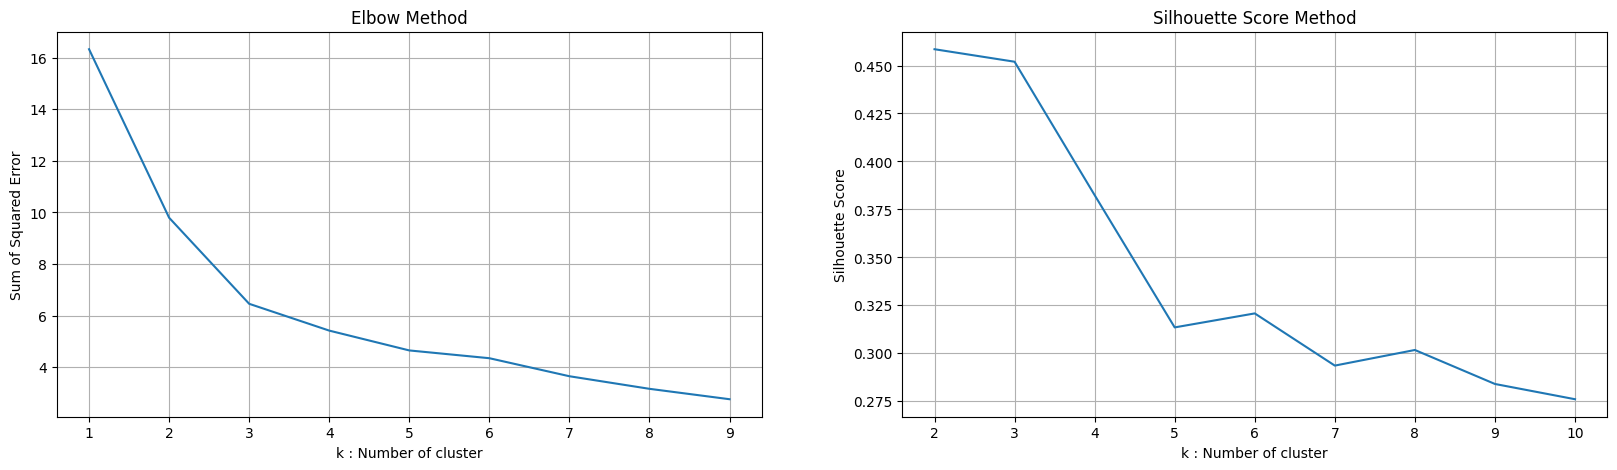

In [ ]:
sse = {} #inertia values
sil = [] #silhoutte values
kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(...): #test for k from 1 to 10
    kmeans = .... #initiate kmeans clustering, with clusters k, iterations 1000, and fit the feature combination data
    sse[k] = kmeans....  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = .. , y = .. ); #line plot for inertia
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = .... #kmeans cluster and fit 
    labels = kmeans.labels_
    sil.append(.... ) #calculate the silhoutte score using euclidean distance
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3**

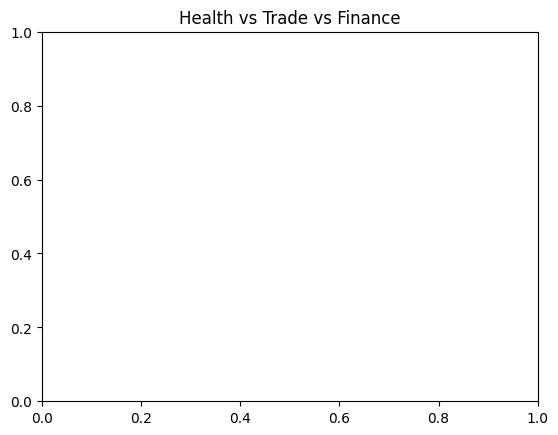

In [ ]:
model = .... #based on above results, calculate kmeans for k = 3
model....  # fit the feature combination dataset
cluster = model.... #get the centroids
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels; df1['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
ax.scatter(x,y,z,c = y)
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

- Now we have got the clusters but we don't know which value corresponds to what! 
- Hence, we draw a boxplot of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

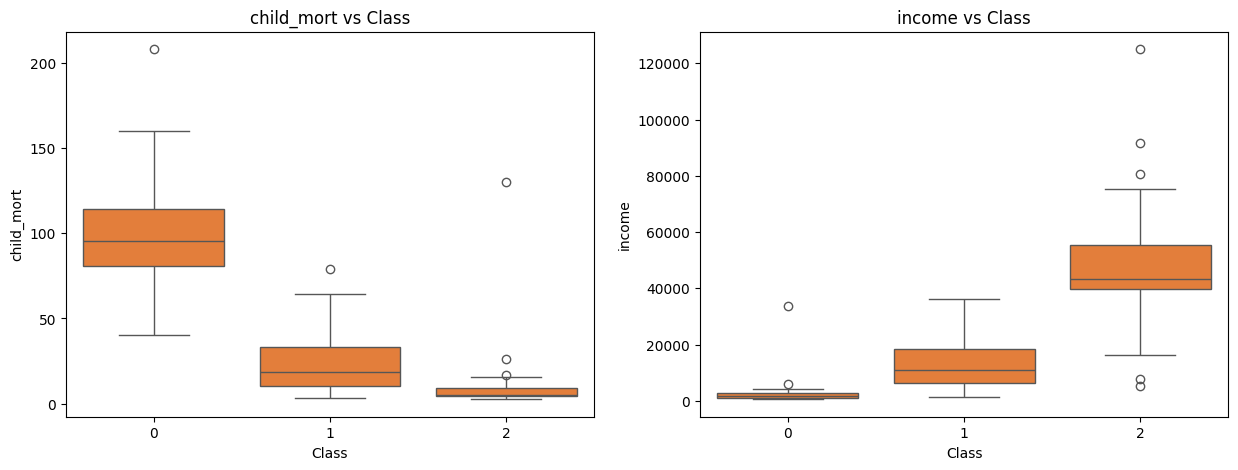

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : No Help Needed**
    - **1 : Help Needed**
    - **2 : Might Need Help**

In [ ]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### <center>PCA Data</center> 

# Do the same for PCA Data

#### Elbow Method & Silhouette Score Method :

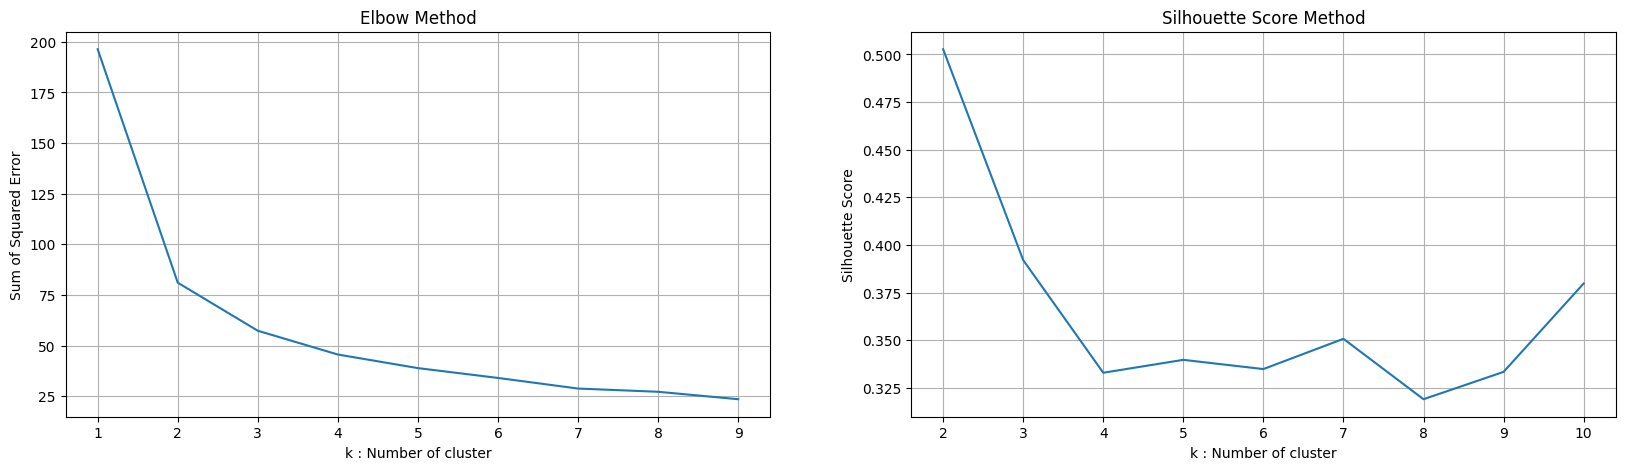

In [ ]:
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = ... #kmeans for pca dataset and iterations 1000
    sse[k] = kmeans.... # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = .. , y = ... );
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans =  .... 
    labels = .... 
    sil.append(... ) #calculate silhoutte 
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- From the results of the above 2 methods, we select :
    - **k : Clusters = 3**        

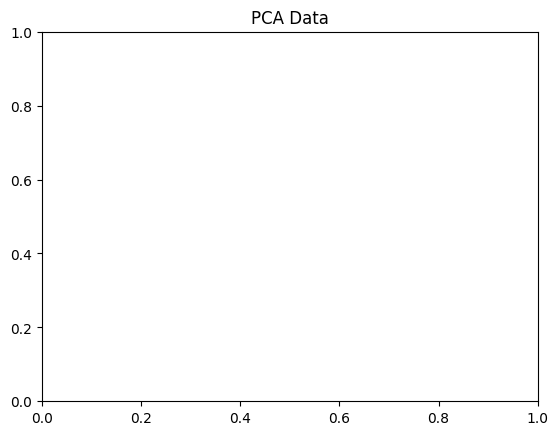

In [ ]:
model = .. #kmeans for k = 3 and iterations 1000
model.fit(m2)
cluster = model..... #centroids
centroids = np.array(cluster)
labels = model.labels_
data['Class'] = labels
pca_df2['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
ax.scatter(x,y,z,c = y)
plt.show();

- We again check the scatterplot of **income** & **child_mort** w.r.t labelled clusters for confirming the cluster values!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

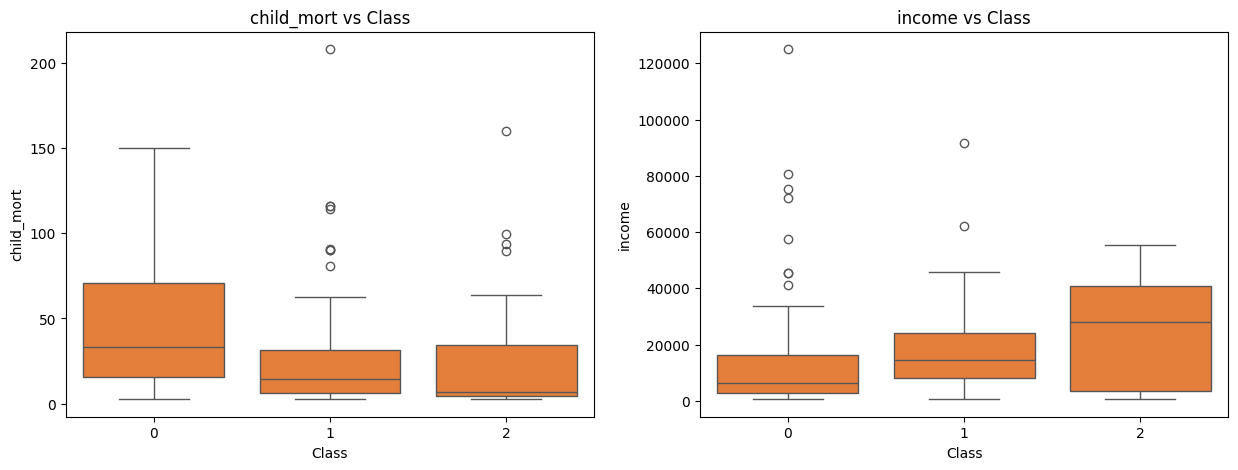

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : Might Need Help**
    - **1 : Help Needed**
    - **2 : No Help Needed**

In [ ]:
pca_df2.insert(0,column = 'Country', value = data['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## <center>Density Based Spatial Clustering of Application with Noise Clustering</center>

**DBSCAN Clustering** is a density based clustering algorithm that is used for unsupervised learning problems.
- In a bid to eliminate the problems of **K-Means Clustering** with nested data and high-dimensional data, **DBSCAN Clustering** eliminates it! It's has 3 important terms & 2 important hyperparameters :
    - Terms :
        - **Core Point** : It is the center point that has **minPts** number of data points present in it's area and the points under it's area can extend the cluster.
        - **Non-Core Point** : It is the center point that does not have **minPts** number of data points present in it's area and it cannot extend the cluster.
        - **Outliers / Noise** : It is the data points that are not a part of any cluster.
    - Hyperparameters :
        - **minPts** : It is the minimum number of data points that need to be present in the area of a point to be considered as a core point.
        - **Epsilon** : It is the radius of the area of a center point.
- **DBSCAN Clustering** creates the clusters in the following way :        
    - Select a random point and consider it as a center point from the data. 
    - Check the other data points that present in the area of this center point with the **Epsilon** value as it's radius.
    - If this area has **minPts** number of data points in it, then the center point is considered as a **core point**. 
    - The data points in this area are then considered as **core point** that further extends by the same rules creating a cluster. 
    - If any of the point does not satisfy the rules, it is considered as **non-core point** that remains the part of the cluster but it cannot extend the cluster further.
    - When all the **core points** are done with engulfing the other data points, **non-core points** are included & the cluster is completed.
    - The next cluster then starts forming by the same rules. Some of the points don't be a part of any of the clusters, such points are known as **outliers / noise**.
- As you might have noticed, the hyperparameters play a crucical role in this process. Thus, they have certain rules for assigning them values :
    - **minPts** : If D represents the number of dimensions / features of a dataset, then **minPts** >= D + 1. Typically **minPts** >= 2 * D is selected for smaller or noisy datasets. 
    - **Epsilon** : It's value is usually decided using the **k-distance graph** that is determined from the **KNN model**. The value at which the graph changes sharply is selected.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### <center>Feature Combination : Health - Trade - Finance</center> 

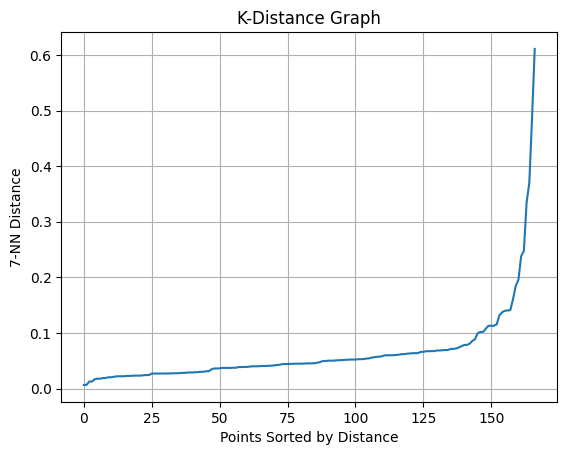

In [ ]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [ ]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; df1['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


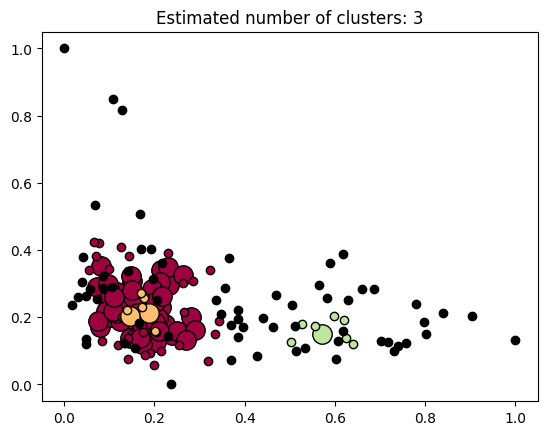

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

- Now we have got the clusters but we don't know which value corresponds to what! 
- Hence, we draw a boxplots of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

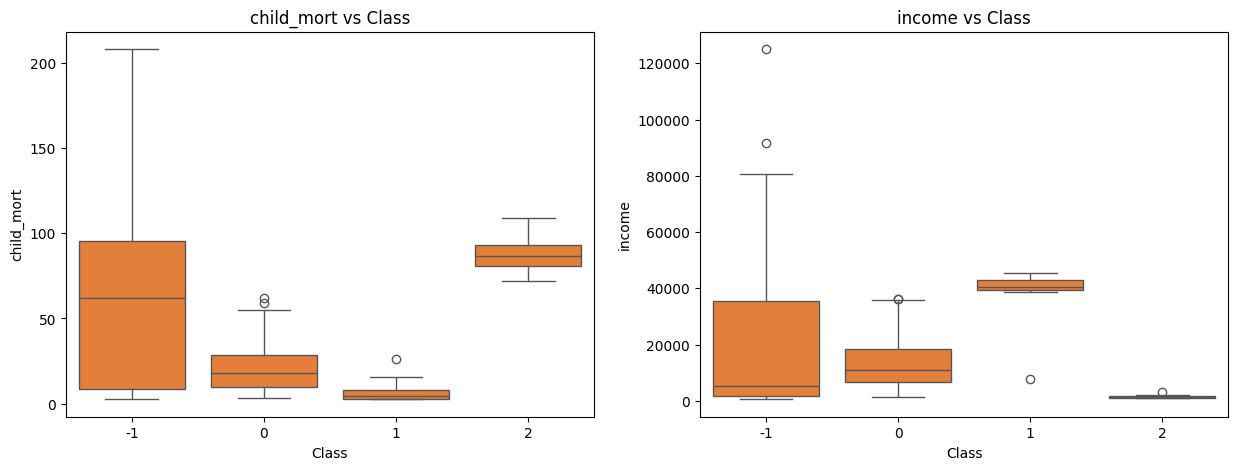

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- By rule **-1** is associated with **Noise / Outliers**!
- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Might Need Help**
    - **1 : No Help Needed**
    - **2 : Help Needed**

In [ ]:
df1['Class'].loc[df1['Class'] == -1] = 'Noise / Outliers'
df1['Class'].loc[df1['Class'] == 0] = 'Might Need Help'
df1['Class'].loc[df1['Class'] == 1] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 2] ='Help Needed'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### <center>PCA Data</center> 

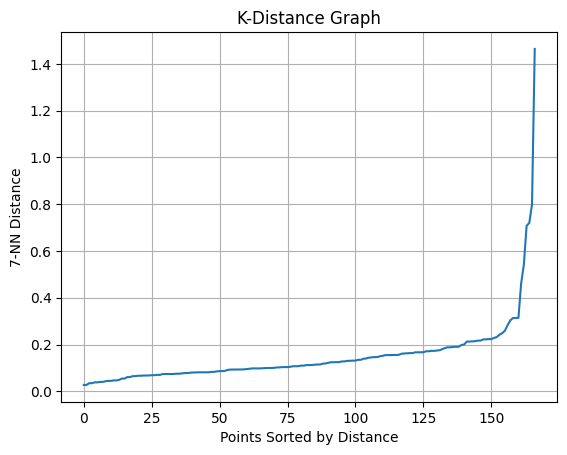

In [ ]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');
plt.grid()
plt.plot(distances);

- We select **minPts** = 8 i.e >= 2 * 3 features 
- The value assigned to the **n_neighbors** : **minPts** - 1.
- From the graph above, we select :
    - **eps** : 0.08

In [ ]:
db = DBSCAN(eps = 0.2, min_samples = 8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; pca_df2['Class'] = labels

Number of Clusters :  3
Number of Outliers :  94


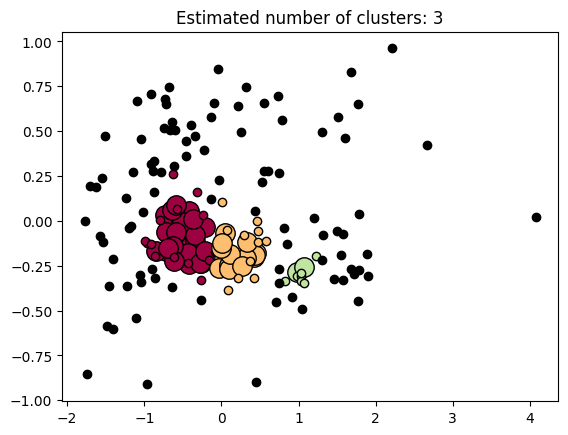

In [ ]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

- We again draw boxplots of **income** & **child_mort** w.r.t labelled clusters for identifying the assistance required by the nations!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

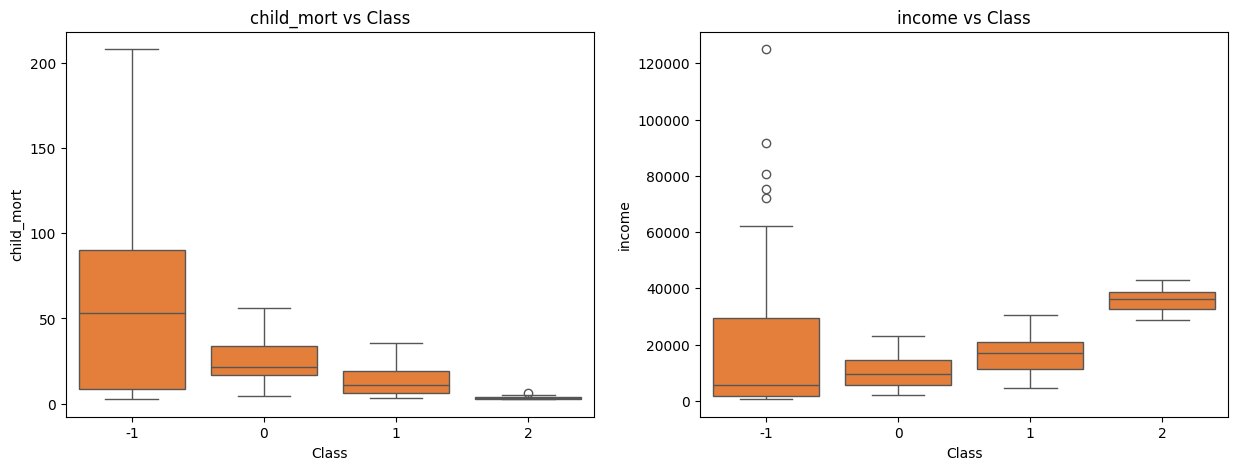

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **-1 : Noise / Outliers**
    - **0 : Help Needed**
    - **1 : Might Need Help**
    - **2 : No Help Needed**

In [ ]:
pca_df2['Class'].loc[pca_df2['Class'] == -1] = 'Noise / Outliers'
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] ='No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color_discrete_sequence=["orange", "red", "green",'black'],
                    color = pca_df2['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

## <center>Hierarchical Clustering<center>

**Hierarchical Clustering** is a distanced based algorithm that is used for unsupervised learning problems. 
    
- It develops the hierarchy of clusters in the form of a tree i.e known as the **dendrogram**. For this problem we are going to use **Agglomerative Clustering** which is a bottom-up approach that considers all the points as clusters and then merges them together based on their distances in the following ways :
    - Initally all the points are considered as clusters.
    - Then, clusters that are closer together they start merging as new cluster.
    - This combined cluster then further gets compared with other clusters and the closest cluster gets merged.
    - This process continues till a single large cluster is formed.
- This process of forming clusters can then be viewed with a **dendrogram**. From it, we select the number of clusters by identifying the number of merges present at the penultimate stage. More is the length of the vertical lines, higher the distance between the clusters.
- To select the number of clusters, we set a threshold value and count the number of vertical lines present above it. This number of vertical lines forms the number of clusters. Other methods like **Silhouette Score Method** and **Elbow method** can also be used.
- For **Agglomerative Clustering**, it has 2 important hyperparameters :
    - **linkage** : There are various connecting or linking methods for cluster i.e Single, Centroid, Average , etc.
    - **affinity** : It is the distance formula that compares the distance before merging the clusters. 

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

### <center>Feature Combination : Health - Trade - Finance</center> 

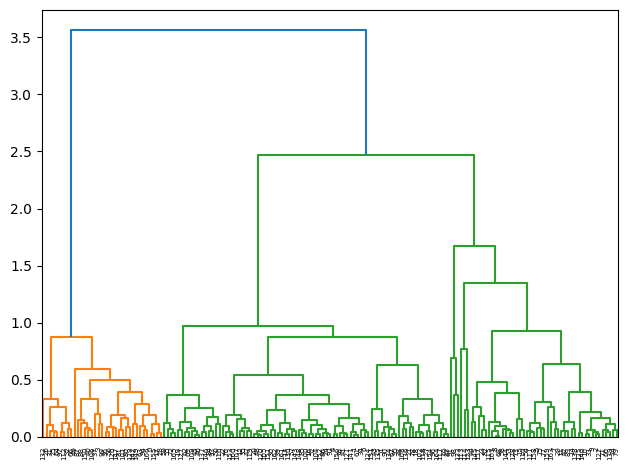

In [ ]:
linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- In this case, we need to divide the countries into 3 categories. That is why we will select a 3 clusters directly. Dendrogram analysis for this dataset is kind of redundant. 
- Here, we can see that 1 **blue line** alongwith 2 **red lines** are the penultimate clusters that before connecting together.
- It has 3 branches, thus indicating the **3 clusters** that it creates before merging into 1!

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; df1['Class'] = pred_agc

NameError: name 'm1' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

NameError: name 'plt' is not defined

- Now we have got the clusters but we don't know which value corresponds to what! 
- Hence, we draw a boxplots of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

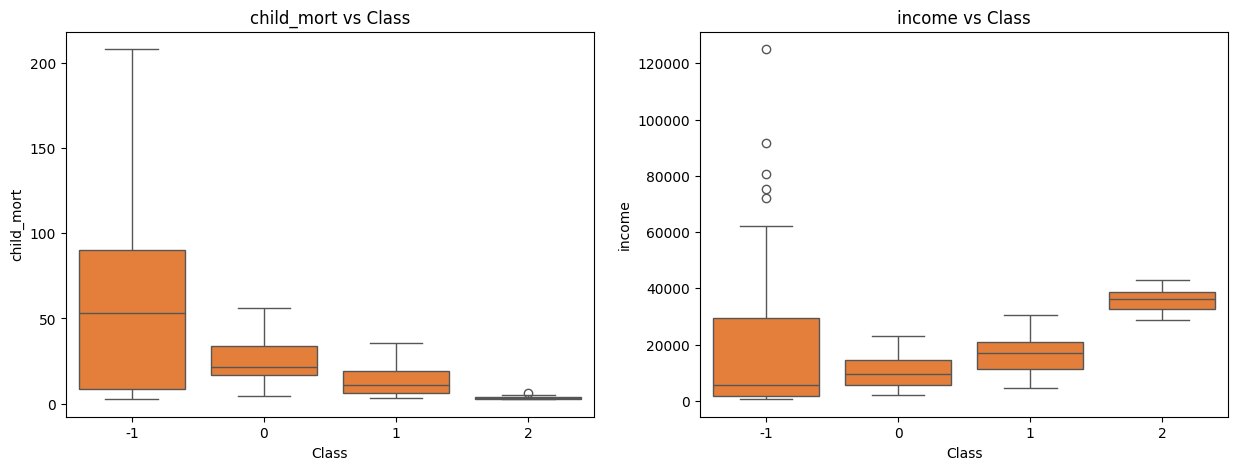

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : No Help Needed**
    - **1 : Help Needed**
    - **2 : Might Need Help**

In [ ]:
df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],  
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

### <center>PCA Data</center>

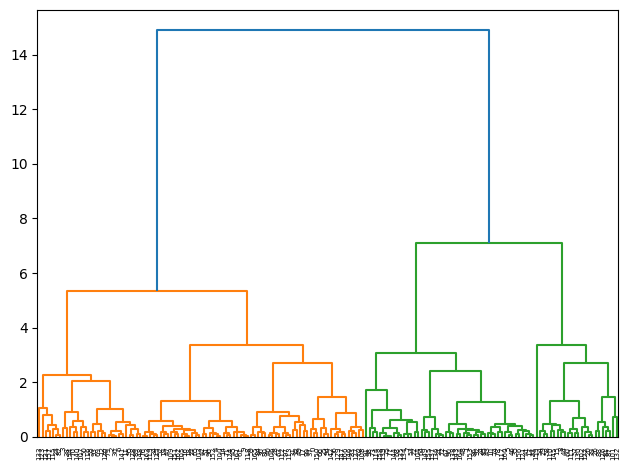

In [ ]:
linkage_data = linkage(m2, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- In this case, we need to divide the countries into 3 categories. That is why we will select a 3 clusters directly. Dendrogram analysis for this dataset is kind of redundant.
- Here, again, we can see that 1 **blue line** alongwith 2 **red lines** are the penultimate clusters formed before connecting together.
- It has 3 branches, thus indicating the **3 clusters** that it creates before merging into 1!

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(m2)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; pca_df2['Class'] = pred_agc

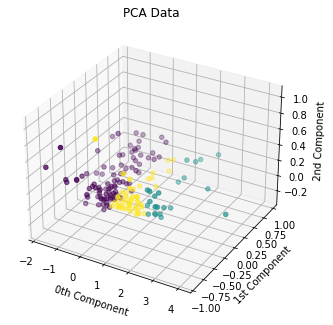

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])
ax.scatter(x,y,z,c = pca_df2['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

- We again draw boxplots of **income** & **child_mort** w.r.t labelled clusters!
- We know that **low income and high child mortality** is a sign of an **economically backward nation**.

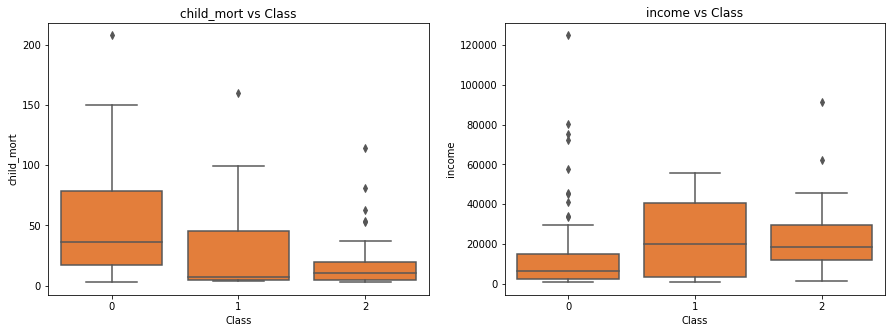

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F');
plt.title('income vs Class')

plt.show()

- From the above plot we can conclude :
    - **0 : Help Needed**
    - **1 : Might Need Help**
    - **2 : No Help Needed**

In [ ]:
pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],  
                    color_discrete_map={'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Conclusion</div></center>

- This is a great dataset that has been applied for a noble cause which highlights the scope of utilizing Data Science practices.


- A model's performance is the reflection of the quality of the data feed to it. EDA section of this dataset provides a list of insights. Effect of normalization and standardization is massive on model performance.


- Feature engineering is pivotal! For **feature combination & PCA data**, complexity of methods to achieve it is clearly visible. These processes highlight the various options open and thus requires us to be sensible in choosing the methods depending on the data and the problem statement.


- **K-Means Clustering**, **Hierarchical Clustering** and **DBSCAN Clustering** are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great.    

### References :
- https://brainly.in/question/6909751#:~:text=Answer%3A,and%20increase%20in%20population%20etc.
- https://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/
- https://www.youtube.com/watch?v=7xHsRkOdVwo
- https://sharkcoder.com/data-visualization/seaborn-boxplot
- [For plotly world map, referred Kaggle Notebook | Username - IRON486](https://www.kaggle.com/code/die9origephit/country-data-clustering-k-means-and-visualization)
- [Image Source](http://help-international.org/sites/default/files/images/CAM21488.jpg)

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Please upvote if you like the work!</div><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Any sort of feedback is appreciated!</div><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Thank You!</div></center>